<a href="https://colab.research.google.com/github/r-manna/CBTCIP/blob/main/CBT_ALCOHOL_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section
NAME : SUBHADIP MANNA
.TASK-3:SALES PREDICTION(TIME SERIES FORECASTING)

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Alcohol_Sales.csv')
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [ ]:
df.shape

(325, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
df['S4248SM144NCEN'].describe()

count      325.000000
mean      7886.400000
std       2914.269061
min       3031.000000
25%       5231.000000
50%       7481.000000
75%       9977.000000
max      15504.000000
Name: S4248SM144NCEN, dtype: float64

In [ ]:
df.columns=['DATE','SALES']
df.head()

,DATE,SALES
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [ ]:
df['DATE']=pd.to_datetime(df['DATE'],infer_datetime_format=True)
df=df.set_index('DATE')
df.head()

<ipython-input-9-04bbc86a785d>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DATE']=pd.to_datetime(df['DATE'],infer_datetime_format=True)


,SALES
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SALES   325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
#from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

<function matplotlib.pyplot.show(close=None, block=None)>

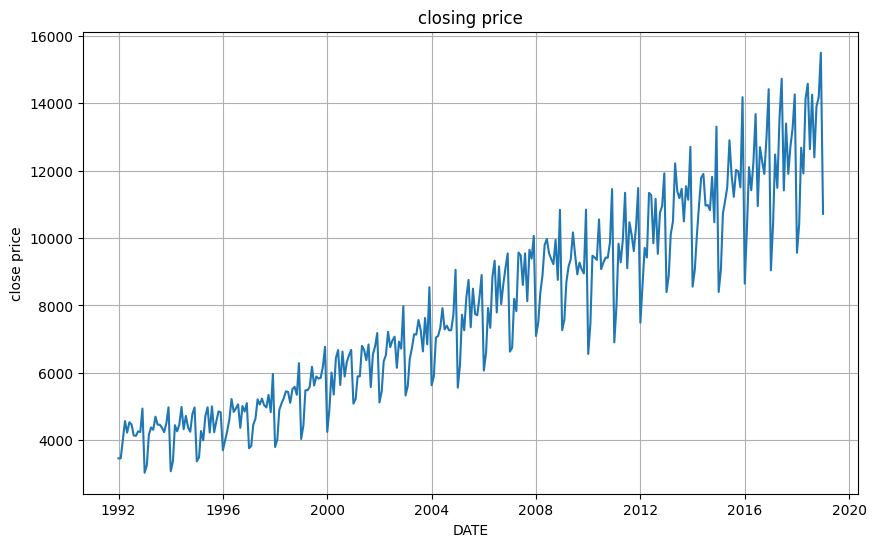

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('DATE')
plt.ylabel('close price')
plt.plot(df['SALES'])
plt.title('closing price')
plt.show

In [ ]:
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_alc = df['SALES']

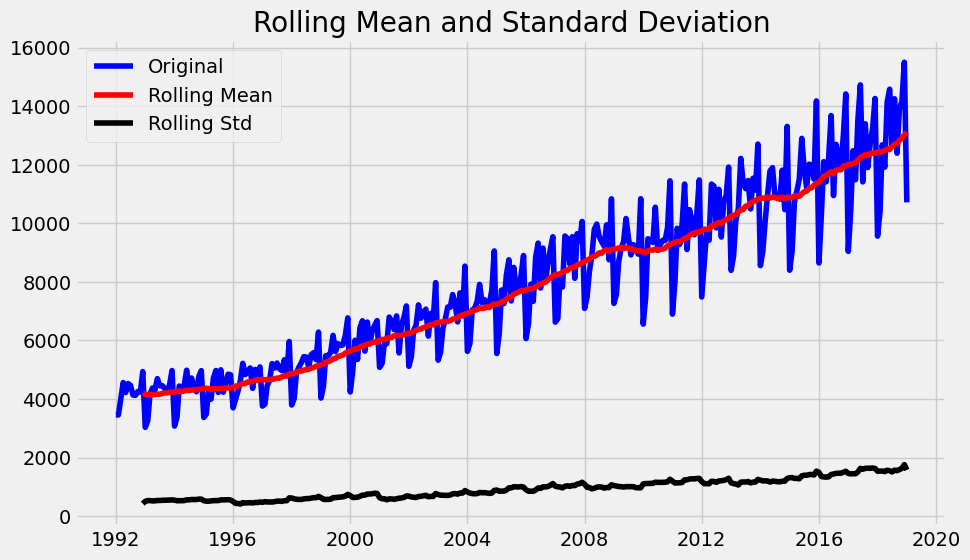

Results of dickey fuller test
Augmented Dicky-Fuller Test
Adf Test Statistics:2.037404725913695
p-value:0.9987196267088919
# of lags:14
Num of Observations used:310
weak evidence against null hypothesis
Fail to reject null hypo
Data has a unit root, it is a non-stationary


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    print("Augmented Dicky-Fuller Test")
    labels=['Adf Test Statistics', 'p-value', '# of lags', 'Num of Observations used']

    for value,label in zip(adft,labels):
        print(label+ ":"+str(value))

    if adft[1]<= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypotesis")
        print("data has no unit root and is stationary")
    else:
        print('weak evidence against null hypothesis')
        print('Fail to reject null hypo')
        print('Data has a unit root, it is a non-stationary')


    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values



test_stationarity(df_alc)

<Figure size 1000x600 with 0 Axes>

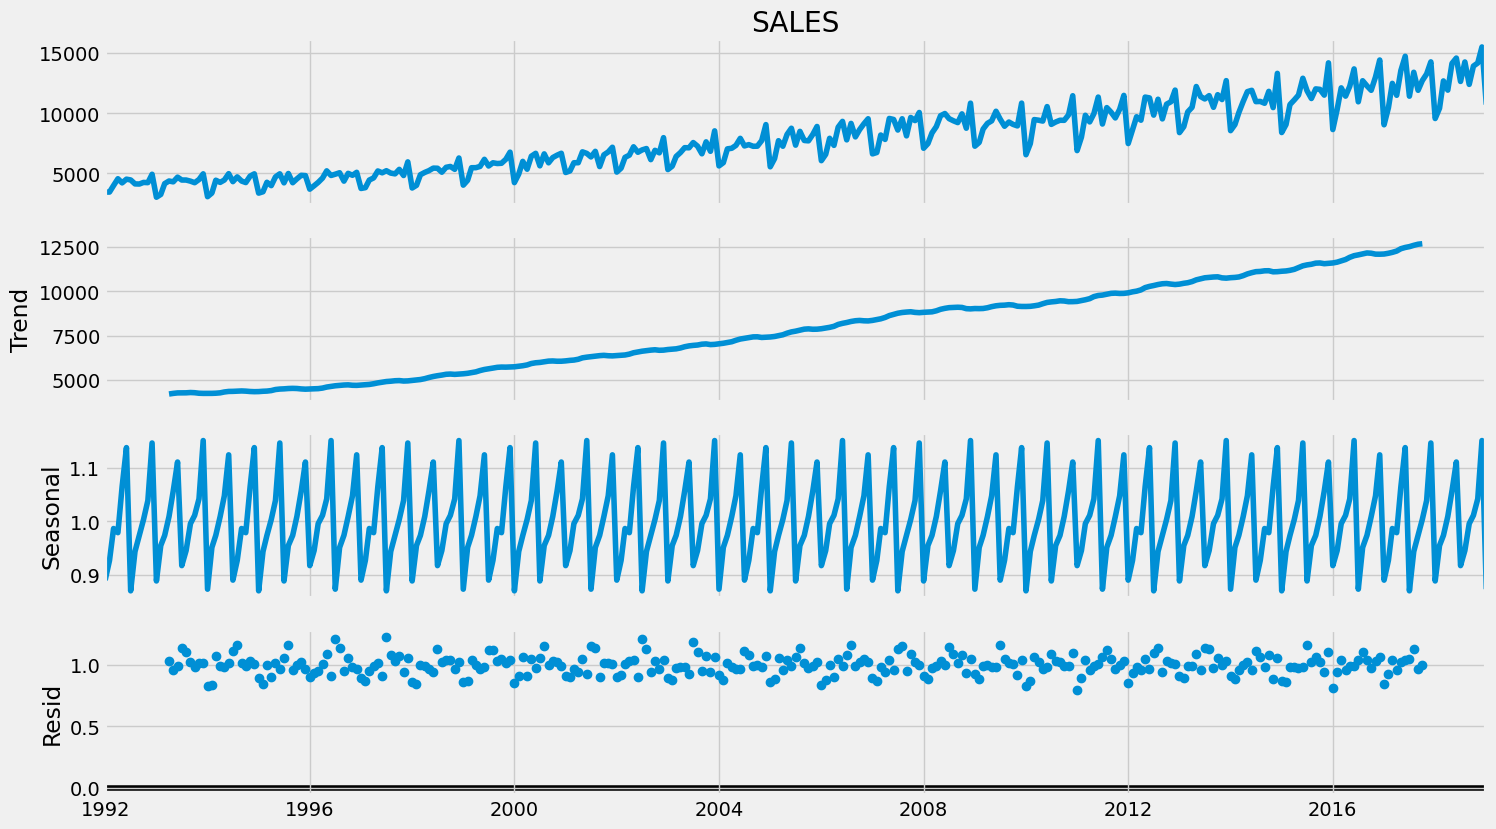

In [ ]:
result = seasonal_decompose(df_alc, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

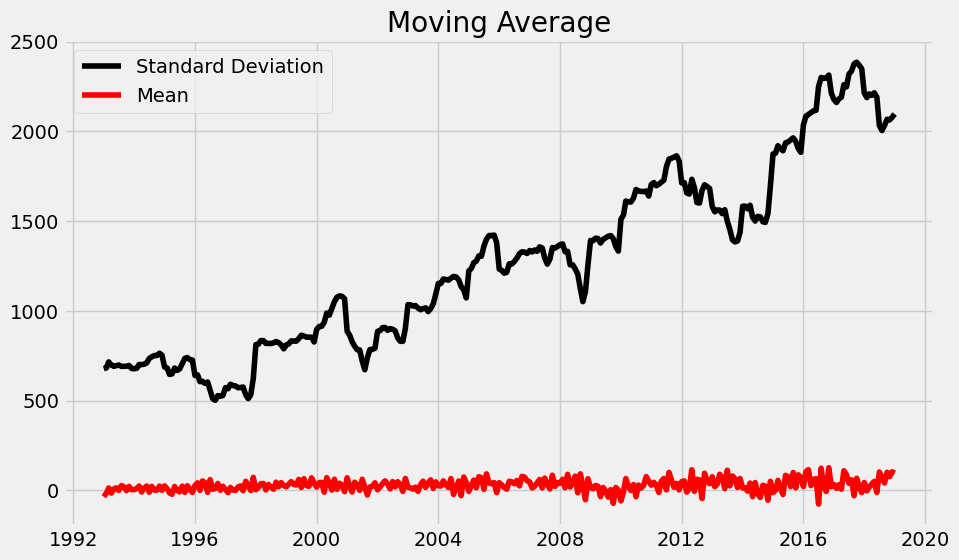

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#df_log = np.log(df_close)
df_log = df['SALES'] - df['SALES'].shift(1)
df_log=df_log.dropna(axis=0)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

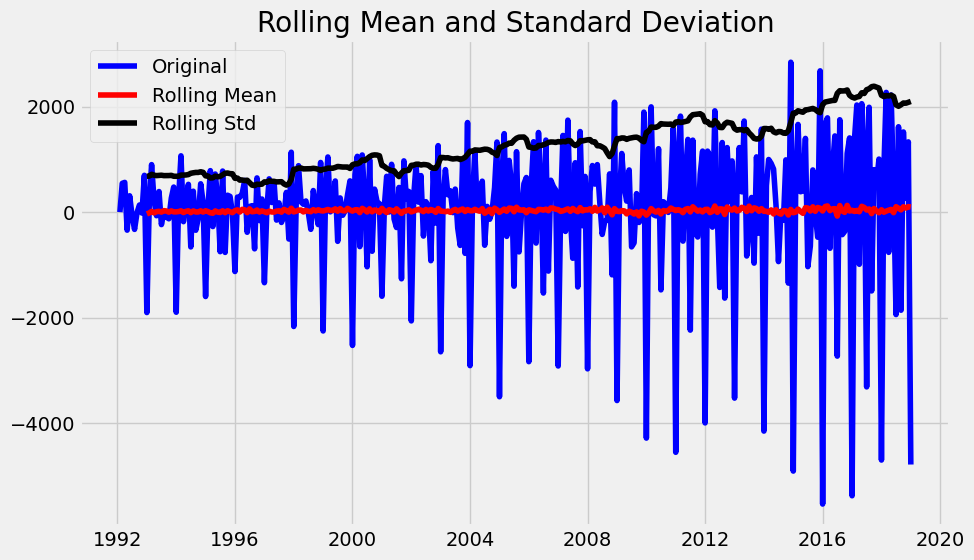

Results of dickey fuller test
Augmented Dicky-Fuller Test
Adf Test Statistics:-4.36595961924603
p-value:0.0003408284921170342
# of lags:13
Num of Observations used:310
Strong evidence against null hypothesis
reject null hypotesis
data has no unit root and is stationary


In [ ]:
test_stationarity(df_log)

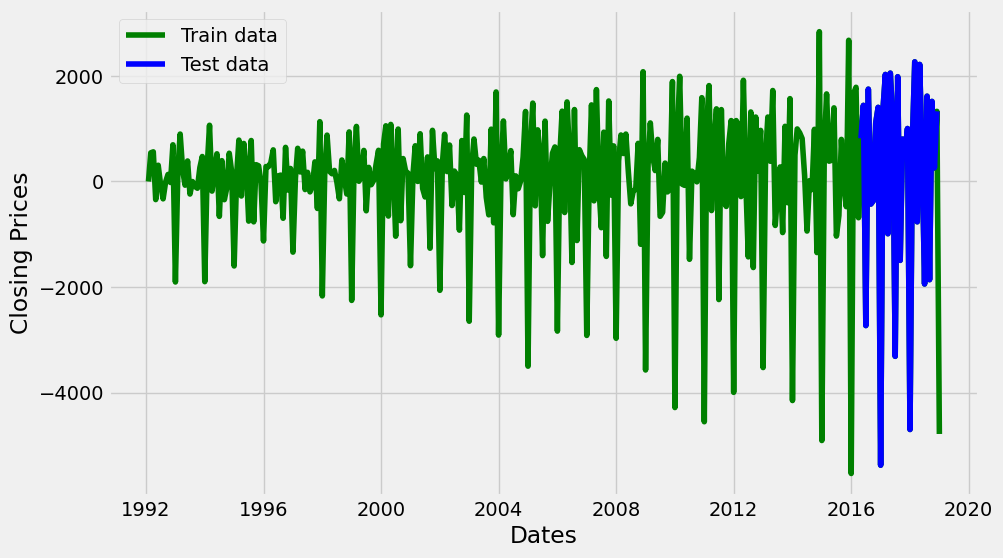

In [ ]:
#split data into train and training set
train_data= df_log.iloc[:(int(len(df_log)*0.9))]
test_data =df_log.iloc[int(len(df_log)*0.9):len(df_log)-1]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
train_data.shape

(291,)

In [ ]:
test_data.shape

(32,)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
# help(auto_arima) Get info on parameters

# Turn off warnings that can be distracting and of no concern
import warnings
warnings.filterwarnings('ignore')


# Trace shows the 1st couple ARIMA models it tried to fit
step_fit = auto_arima(train_data, m=12, trace=True)

# Returns AIC and BIC which estimate the quality of the models
# Then summary provides the best performing model
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=3991.559, Time=9.22 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4316.663, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4196.208, Time=1.70 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4101.995, Time=3.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4314.669, Time=0.18 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=4004.520, Time=7.83 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=4012.965, Time=3.77 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=3978.383, Time=18.07 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=3999.018, Time=6.10 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=3940.966, Time=11.62 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=3985.943, Time=8.80 sec
 ARIMA(1,0,2)(2,1,2)[12] intercept   : AIC=4007.469, Time=10.93 sec
 ARIMA(2,0,1)(2,1,2)[12] intercept   : AIC=3946.011, Time=9.36 sec
 ARIMA(3,0,2)(2,1,2)[12] intercept   : AIC=3945.501, Time=10.59 sec
 ARIMA(2,0,3)(2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  291
Model:             SARIMAX(4, 0, 4)x(2, 1, [1, 2], 12)   Log Likelihood               -1953.031
Date:                                 Sat, 20 Jul 2024   AIC                           3934.062
Time:                                         06:06:17   BIC                           3984.899
Sample:                                     02-01-1992   HQIC                          3954.455
                                          - 04-01-2016                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.0247     13.398      0.748      0.454     -16.234      36.284
ar.L1         -2.3568      0.191    -12.318      0.000      -2.732      -1.982
ar.L2         -2.6200      0.320     -8.189      0.000      -3.247      -1.993
ar.L3         -1.4698      0.308     -4.765      0.000      -2.074      -0.865
ar.L4         -0.2339      0.123     -1.904      0.057      -0.475       0.007
ma.L1          1.4240      0.168      8.472      0.000       1.095       1.753
ma.L2          0.6835      0.216      3.165      0.002       0.260       1.107
ma.L3         -0.4090      0.194     -2.112      0.035      -0.788      -0.029
ma.L4         -0.6294      0.127     -4.940      0.000      -0.879      -0.380
ar.S.L12       1.1365      0.278      4.089      0.000       0.592       1.681
ar.S.L24      -0.5551      0.141     -3.926      0.000      -0.832      -0.278
ma.S.L12      -1.5071      0.293     -5.150      0.000      -2.081      -0.933
ma.S.L24       0.7600      0.218      3.487      0.000       0.333       1.187
sigma2      9.472e+04   1.23e+04      7.730      0.000    7.07e+04    1.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.00
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.91   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

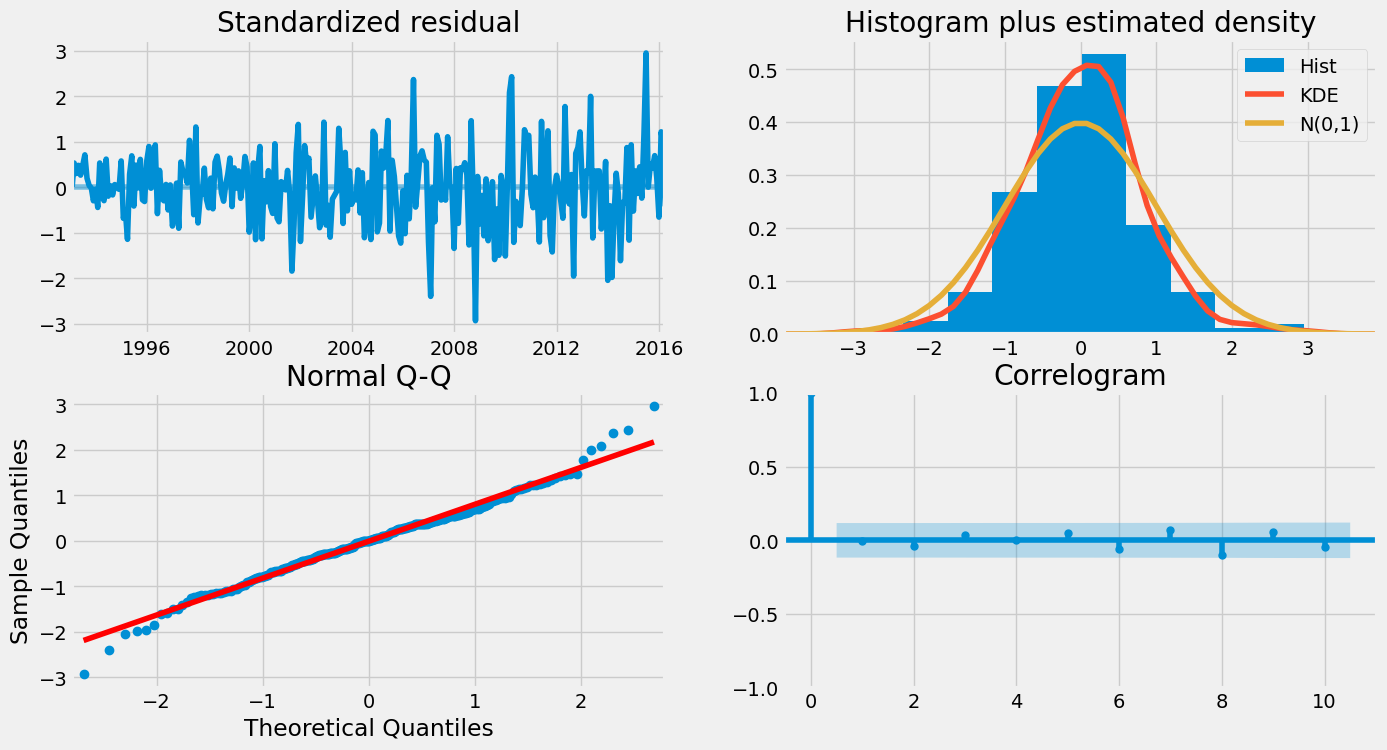

In [ ]:
step_fit.plot_diagnostics(figsize=(15,8))
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                  291
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -2347.273
Date:                Sat, 20 Jul 2024   AIC                           4714.545
Time:                        07:08:15   BIC                           4751.279
Sample:                    02-01-1992   HQIC                          4729.261
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3260      8.298      3.293      0.001      11.063      43.589
ar.L1          0.1706      0.103      1.662      0.096      -0.031       0.372
ar.L2         -0.3082      0.096     -3.202      0.0

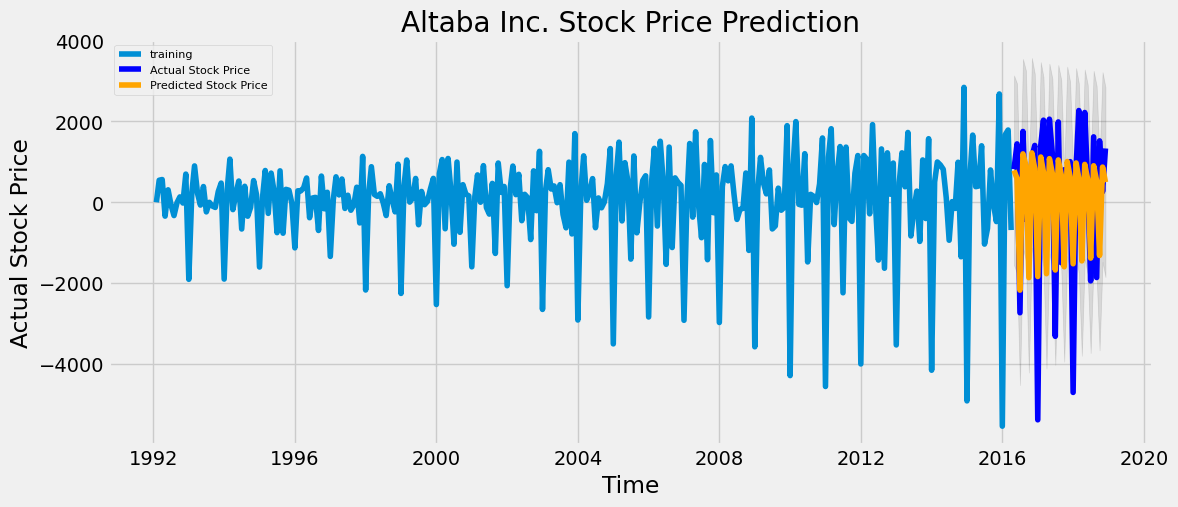

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA from the updated module
model = ARIMA(train_data, order=(4, 0, 4))
fitted = model.fit()  # Remove the 'disp' parameter
print(fitted.summary())# Forecast
# Capture the ForecastResults object
forecast_results = fitted.forecast(32, alpha=0.05)
# Extract values from the ForecastResults object - forecast_results is now a Series
fc = forecast_results # Get predicted mean directly from the Series
se = forecast_results.std() # Estimate standard error from the Series
# Calculate the confidence interval based on standard error
conf = pd.DataFrame({'lower': fc - 1.96 * se, 'upper': fc + 1.96 * se})

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf['lower'], index=test_data.index)
upper_series = pd.Series(conf['upper'], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()